# Part 1

In [ ]:
class GeneralNeuron:
    def __init__(self, firing_rate):
        self.firing_rate = firing_rate

    def activate(self, stimulus_strength):
        pass  # פונקציה לחישוב קצב הירי על פי עוצמת הגירוי


class SensoryNeuron(GeneralNeuron):
    def __init__(self, firing_rate, receptor_type):
        super().__init__(firing_rate)
        self.receptor_type = receptor_type

    def sense_stimulus(self, stimulus):
        pass  # עיבוד הגירוי הספציפי


class Photoreceptor(SensoryNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type="light")

    def light_detection(self, light_intensity):
        pass  # התנהגות ייחודית לקליטת אור

    def light_response(self, light_intensity):
        pass

class Mechanoreceptor(SensoryNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type="pressure")

    def pressure_detection(self, pressure_level):
        pass  # התנהגות ייחודית לקליטת לחץ


class MotorNeuron(GeneralNeuron):
    def __init__(self, firing_rate, target_muscle):
        super().__init__(firing_rate)
        self.target_muscle = target_muscle

    def control_muscle(self):
        pass  # שליטה בשריר על פי רמת ההפעלה


class AlphaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle="skeletal muscle")

    def skeletal_muscle_control(self):
        pass  # שליטה ייחודית בשרירי שלד


class GammaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle="muscle spindle")

    def muscle_spindle_control(self):
        pass  # שליטה ייחודית בכישור השריר


In [ ]:
#שאלות
# מוטור האם הפונקציה צריכה לקבל פרמטר  activation level
# בילדים של המוטור האם צריך לדרוס את הפונקציה של השליטה והאם יש שם עוד פונקציה שצריך להגדיר

# Part 2

## Q1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def find_max_min(arr):
    max_indices = []
    min_indices = []
    
    # לולאה על כל איברי המערך (למעט הקצוות)
    for i in range(1, len(arr) - 1):
        if arr[i] > arr[i - 1] and arr[i] > arr[i + 1]:
            max_indices.append(i)  # מקסימום מקומי
        elif arr[i] < arr[i - 1] and arr[i] < arr[i + 1]:
            min_indices.append(i)  # מינימום מקומי
    
    return max_indices, min_indices


def downsample_signal(signal, downsample_factor=5):
    # מציאת אינדקסים של מקסימום ומינימום
    max_indices, min_indices = find_max_min(signal)
    # יצירת רשימה של כל אינדקסי המקסימום והמינימום
    min_max_indices = np.sort(np.concatenate((max_indices, min_indices)))
    
    # דגימה מחדש: לקיחת כל נקודה חמישית בנוסף לנקודות הקיצון
    downsampled_indices = np.arange(0, len(signal), downsample_factor)
    combined_indices = np.unique(np.concatenate((downsampled_indices, min_max_indices)))
    
    return signal[combined_indices], combined_indices

# יצירת אות סינוסואידלי לדוגמה
time = np.arange(0, 1, 0.01)  # 1 שניה עם דגימה כל 0.01 שניות
frequency = 5  # תדר 5Hz
original_signal = np.sin(2 * np.pi * frequency * time)

downsampled_signal, downsampled_indices = downsample_signal(original_signal)

# Verify
print('Verification:\n1. Length of downsampled_signal is',len(downsampled_signal), 'should be around 20% of original length ',len(original_signal), '\n2. Downsampled signal contains all max and min values of original signal')

og_max_indices, og_min_indices = find_max_min(original_signal)
original_max_min_indices = np.concatenate((og_max_indices, og_min_indices))

for i in range(len(original_max_min_indices)):
    if(original_signal[original_max_min_indices[i]] not in downsampled_signal):
       print("error - missing minimum or maximum value")

# Plotting the original and downsampled signals.

# Original signal.
# The red circles represent the maxima and the green circles represent the minima.
plt.figure(figsize=(12, 6))
plt.plot(time, original_signal, label='Original Signal', color='blue')
plt.plot(time[og_max_indices], original_signal[og_max_indices], color='red', label='Original max')
plt.plot(time[og_min_indices], original_signal[og_min_indices], color='green', label='Original min')

# Downsampled signal
plt.plot(time[downsampled_indices], downsampled_signal, 'o-', label='Downsampled Signal', color='orange')

# Mapping the max and min indices to the downsampled signal
ds_max_indices, ds_min_indices = find_max_min(downsampled_signal)
plt.plot(time[downsampled_indices][ds_max_indices], downsampled_signal[ds_max_indices], 'ro', label='Downsampled Maxima')
plt.plot(time[downsampled_indices][ds_min_indices], downsampled_signal[ds_min_indices], 'go', label='Downsampled Minima')

# Setting plot labels and title
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original and Downsampled Sinusoidal Signal with Maxima and Minima')
plt.legend()
plt.grid(True)
plt.show()






## Q2
NOTE: Please run steps one by one to load dependencies.

### Point 1: 
#### Plot the price of all the laptops.

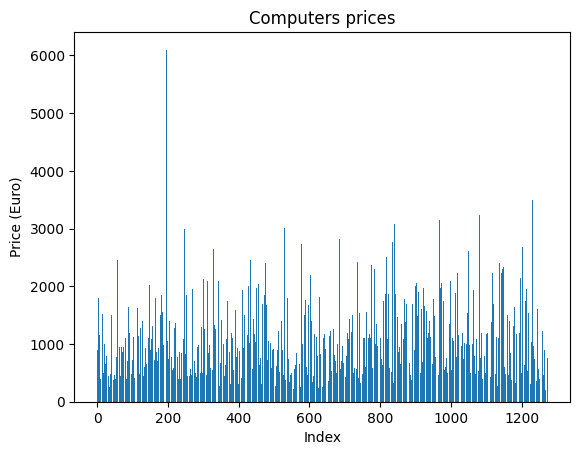

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv("laptop_price - dataset.csv")

laptop_ids = np.arange(0, len(df))
laptop_prices = df['Price (Euro)']

# יצירת גרף
plt.bar(laptop_ids, laptop_prices)
plt.title('Computers prices')
plt.xlabel('Index')
plt.ylabel('Price (Euro)')
plt.show()

### Point 2:
#### Which company has on average the most expensive laptop?

In [4]:
average_price_per_company = df.groupby('Company')['Price (Euro)'].mean()
print(average_price_per_company)
# מציאת החברה עם הממוצע הגבוה ביותר
company_with_max_average = average_price_per_company.idxmax()
max_average_price = average_price_per_company.max()
print(f"The company with the highest average price is {company_with_max_average} with an average price of {max_average_price} Euro")

Company
Acer          633.464455
Apple        1564.198571
Asus         1123.829737
Chuwi         314.296667
Dell         1199.225120
Fujitsu       729.000000
Google       1677.666667
HP           1080.314664
Huawei       1424.000000
LG           2099.000000
Lenovo       1093.862215
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price (Euro), dtype: float64
The company with the highest average price is Razer with an average price of 3346.1428571428573 Euro


### Point 3:
#### Find the different types of operating systems present in the data.

In [5]:
unique_os = df['OpSys'].unique()

print('The operating systems present:\n', unique_os)

The operating systems present:
 ['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']


### Point 4:
#### Plot for each operating system the distribution of the prices.

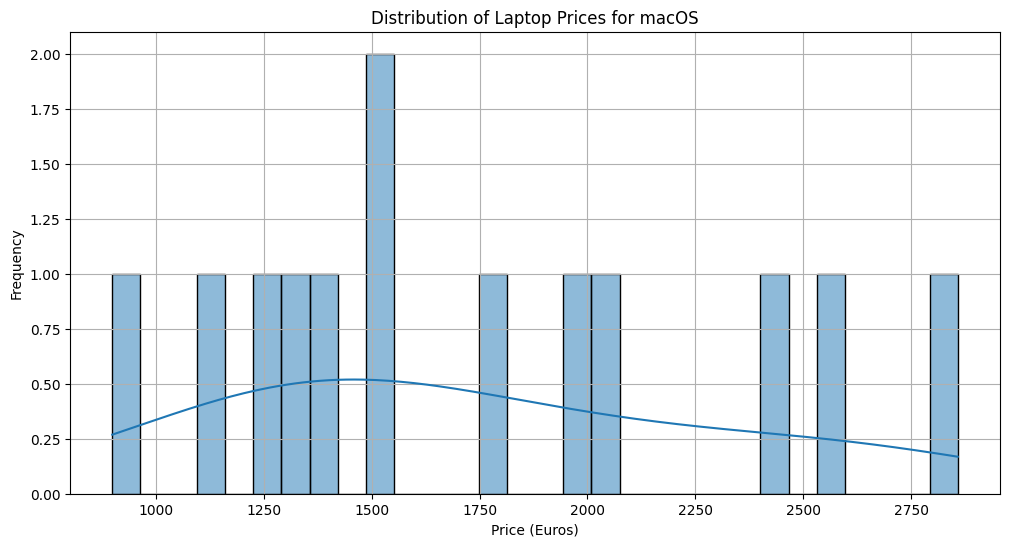

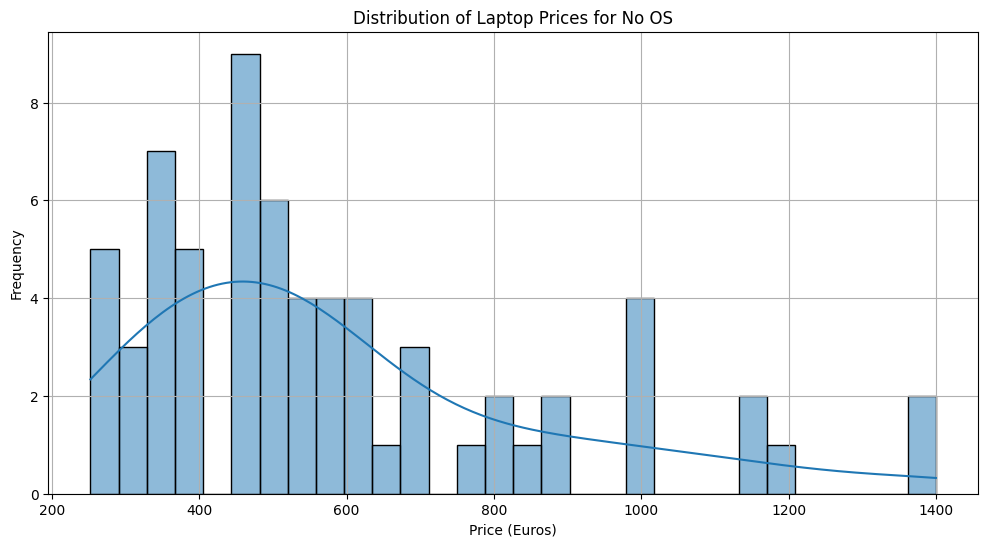

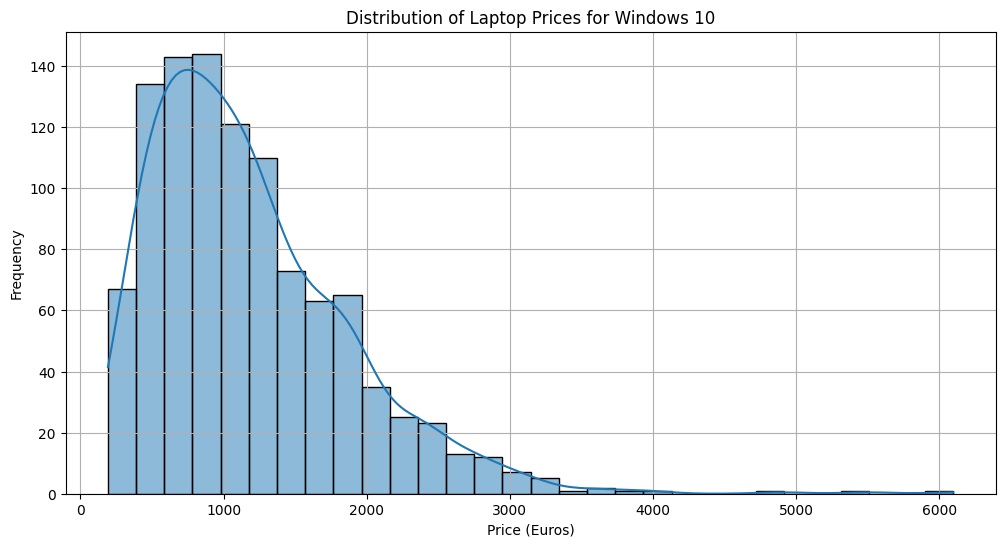

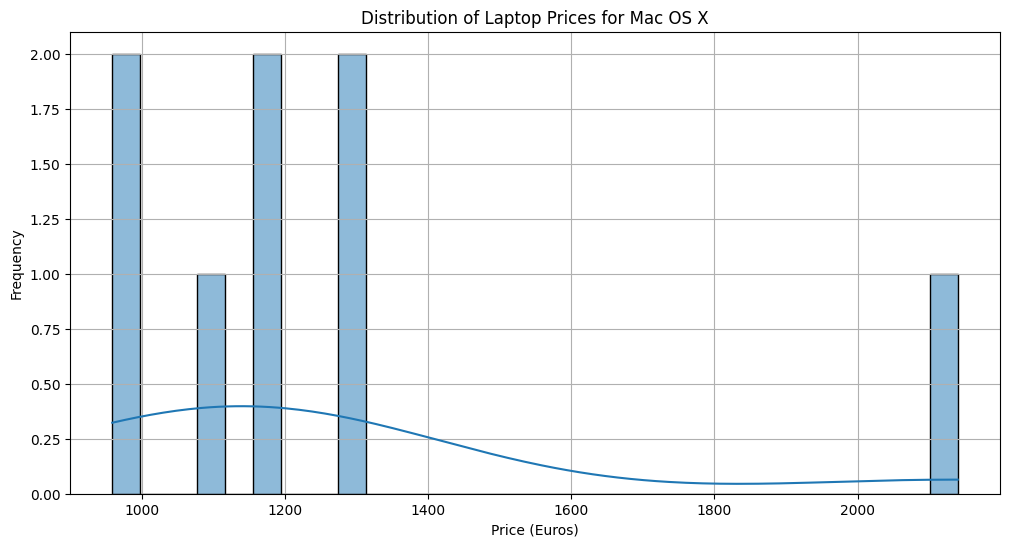

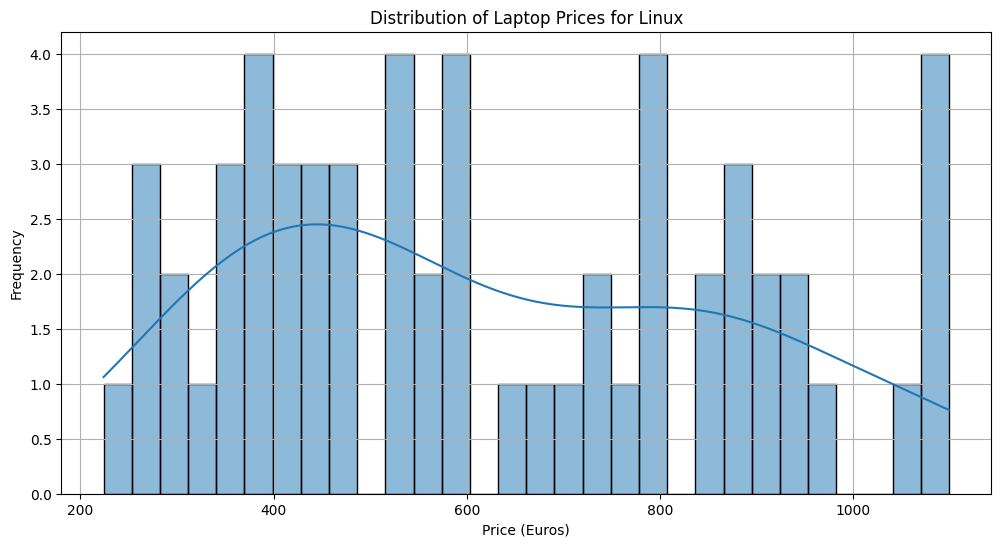

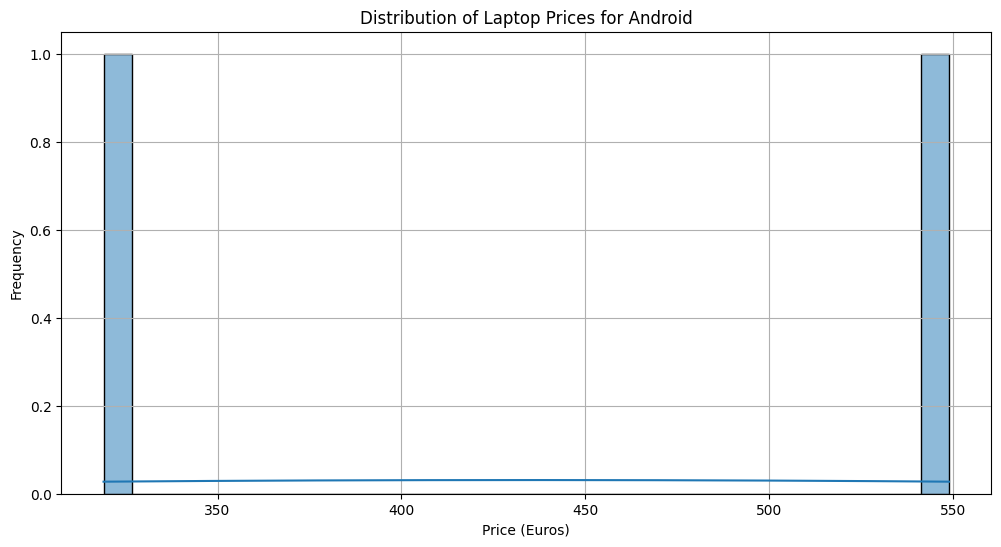

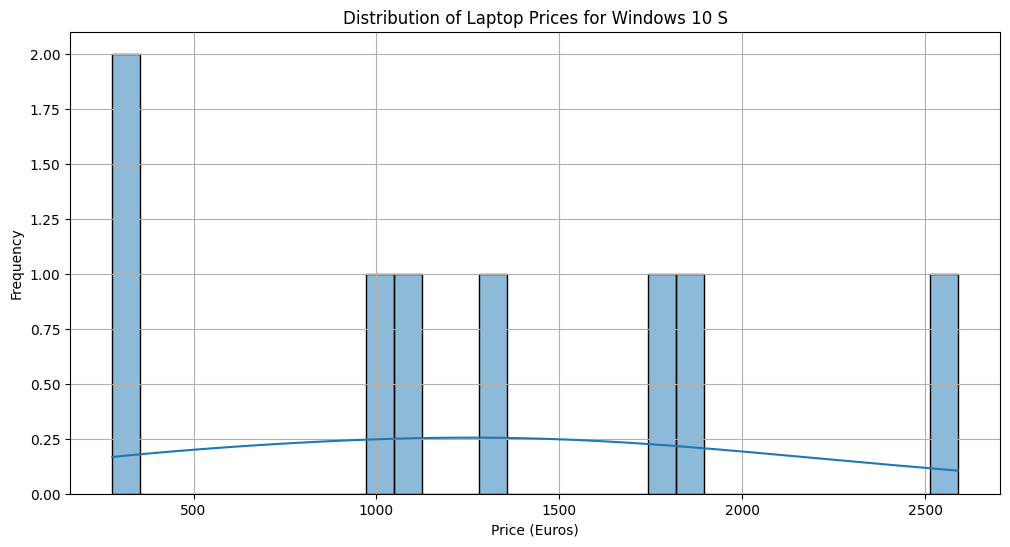

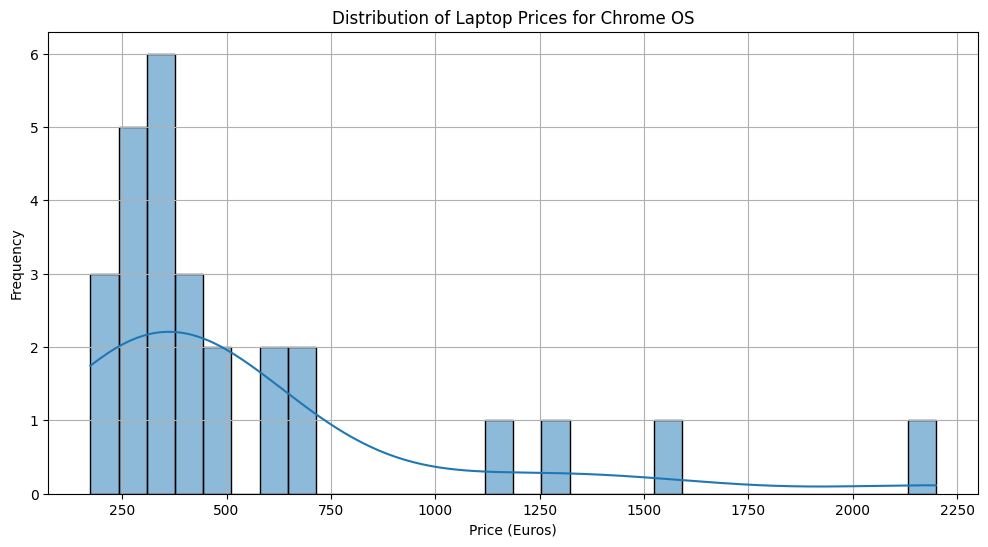

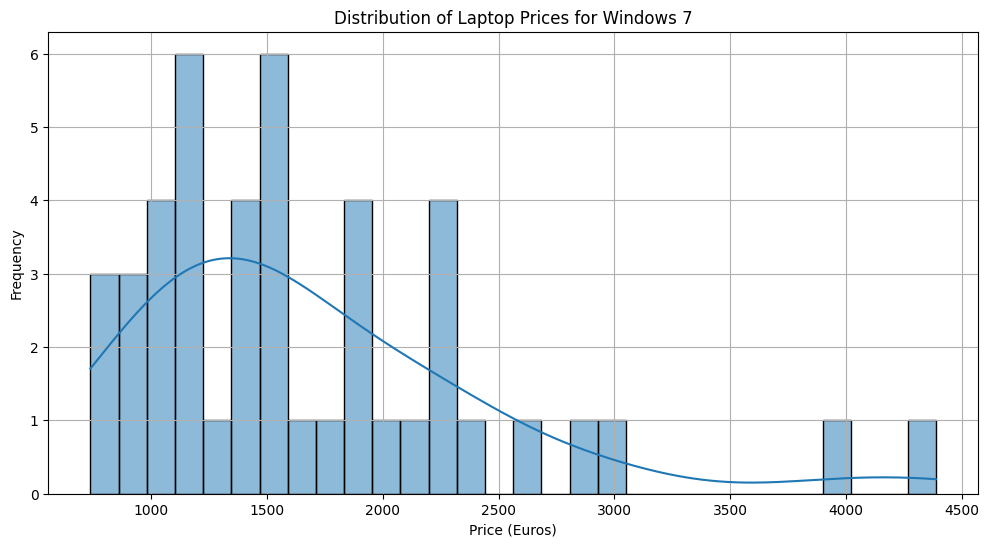

In [6]:
for os in unique_os:
    os_df = df[df['OpSys'] == os]
    plt.figure(figsize=(12, 6))
    sns.histplot(os_df['Price (Euro)'], bins=30, kde=True)
    plt.xlabel('Price (Euros)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Laptop Prices for {os}')
    plt.grid(True)
    plt.show()

### Point 5:
#### Plot the relationship between RAM and price.

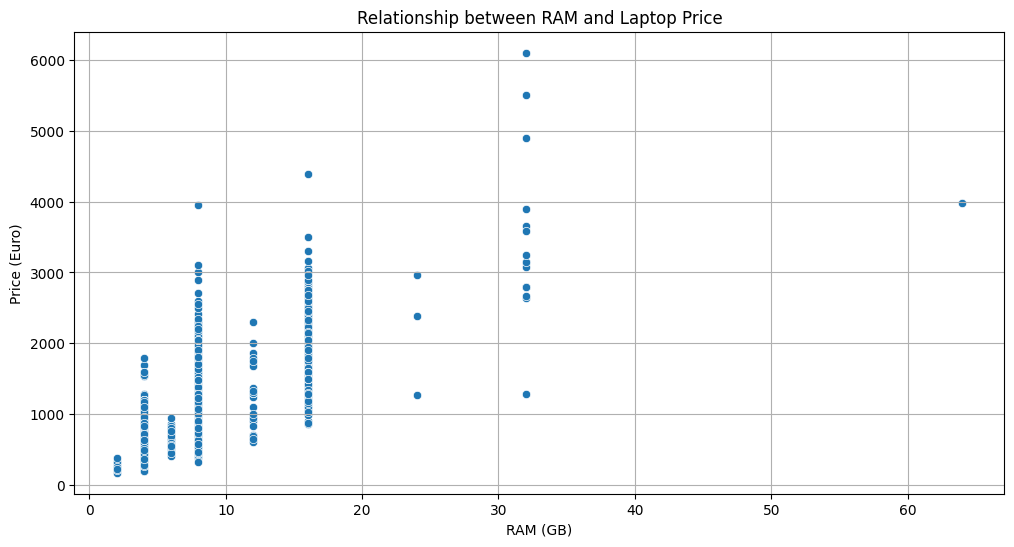

In [7]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='RAM (GB)', y='Price (Euro)', data=df)
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.title('Relationship between RAM and Laptop Price')
plt.grid(True)
plt.show()

### Point 6:
#### Create a new column for the dataframe called 'Storage Type'.

In [16]:
import re
print(df['Memory'].unique(), '\n')

memory_info = df['Memory']

# Creating a function for extracting the memory types from memory information of each entry (line).
def extract_storage_type(memory):
    # Use regex to find all words that are not numbers or units
    storage_types = re.findall(r'\b(Flash Storage|\b[^\d\s]+\b)', memory)
    # Join the storage types into a single string
    return ' + '.join(storage_types)

# Applying the function to the memory_info column.
df['Storage Type'] = memory_info.apply(extract_storage_type)

# Verifying the new column.
print(df[['Memory', 'Storage Type']].head(30))

['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '32GB Flash Storage'
 '128GB SSD +  1TB HDD' '256GB SSD +  256GB SSD' '64GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1.0TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '180GB SSD'
 '1TB HDD +  1TB HDD' '32GB HDD' '1TB SSD +  1TB HDD'
 '512GB Flash Storage' '128GB HDD' '240GB SSD' '8GB SSD' '508GB Hybrid'
 '1.0TB HDD' '512GB SSD +  1.0TB Hybrid' '256GB SSD +  1.0TB Hybrid'] 

                    Memory   Storage Type
0                128GB SSD            SSD
1      128GB Flash Storage  Flash Storage
2                256GB SSD            SSD
3                512GB SSD            SSD
4                256GB SSD            SSD
5                500GB HDD 